### `ENVIRONMENT SETUP`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### `READING FILES`

In [2]:
# Setting working dir
import os
path = 'G:\\ML - Datahack\\HDFC Bank\\Files'

os.chdir(path)

%pwd

'G:\\ML - Datahack\\HDFC Bank\\Files'

In [3]:
train = pd.read_csv('done_train.csv', low_memory=False)
train = train.drop_duplicates()

In [4]:
test = pd.read_csv('done_test.csv', low_memory=False)

In [5]:
train.shape

(16400, 446)

In [6]:
test.shape

(20442, 446)

### `FEATURE SIGNIFICANCE`

In [7]:
# X = train.drop(['Col2'], axis=1)
# y = train.Col2

In [8]:
# df = train.drop('Col2', axis=1)

In [9]:
# import statsmodels.api as sm

# X = sm.add_constant(X) # adding a constant

# model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# print_model = model.summary()
# print(print_model)

In [10]:
# # Dropping features with high P values
# pval = model.pvalues.sort_values(ascending=False)[0]

# p_drop = []

# while  pval > 0.05:
#     col = model.pvalues.sort_values(ascending=False).index.values[0]
    
#     df.drop(col, axis=1, inplace=True)
#     X.drop(col, axis=1, inplace=True)

#     p_drop.append(col)
    
#     print(f'dropping feature {col}')
    
#     model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
    
#     pval = model.pvalues.sort_values(ascending=False)[0]

In [11]:
# X = sm.add_constant(X) # adding a constant

# model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# print_model = model.summary()
# print(print_model)

In [12]:
# if len(p_drop) > 0:
#     train.drop(columns=p_drop, axis=1, inplace=True)
#     test.drop(columns=p_drop, axis=1, inplace=True)

### `CORRELATION`

In [13]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, mutual_info_score, recall_score
from lofo.lofo_importance import LOFOImportance, plot_importance

target = 'Col2'
features  = [col for col in train.columns if col != target]

cv = KFold(n_splits=4, shuffle=False, random_state=0)

from lofo.lofo_importance import LOFOImportance, plot_importance
from sklearn.metrics import make_scorer, mean_absolute_error

scorer = make_scorer(recall_score, greater_is_better=True)

lofo = LOFOImportance(train, features, target, cv=cv, scoring=scorer)
importance_df = lofo.get_importance()

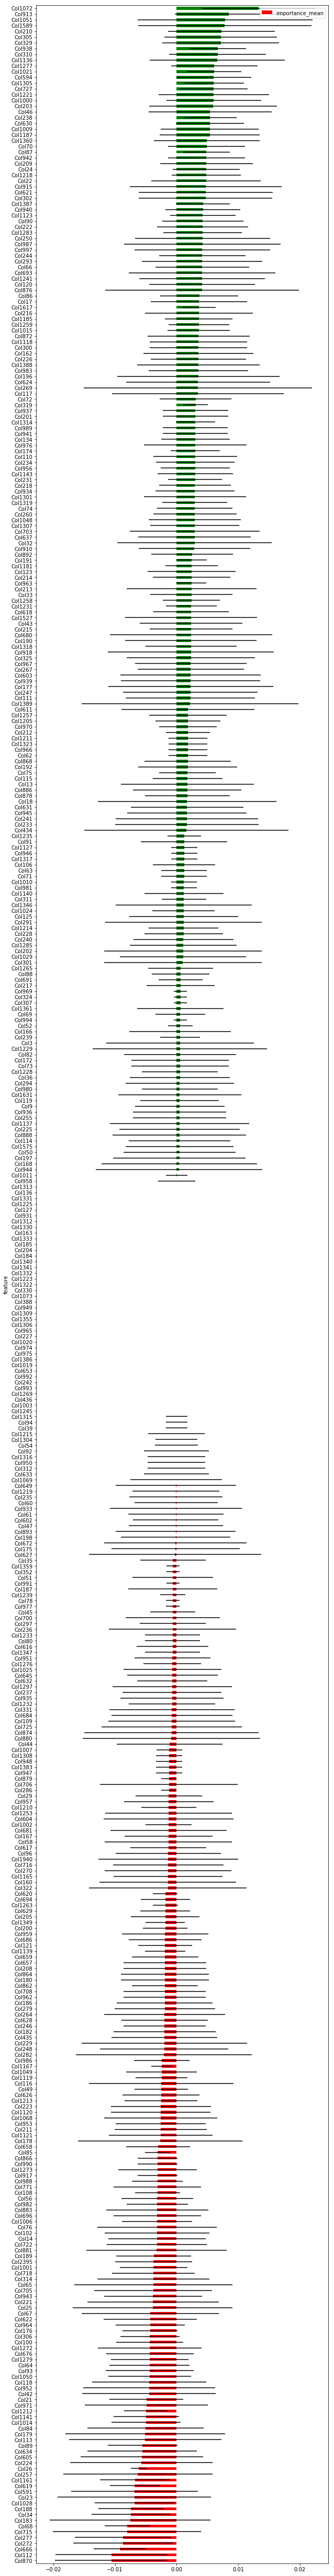

In [15]:
plot_importance(importance_df, figsize=(10,90))

In [16]:
final_features = importance_df[importance_df.importance_mean> 0.00].feature.values

In [17]:
df = train[final_features]
df['Col2'] = train['Col2']
train = df

In [18]:
df = test[final_features]
df['Col1'] = test.Col1

test = df

In [19]:
train.shape

(16400, 206)

In [20]:
test.shape

(20442, 206)

### `SAVING FILE TO DISK`

In [21]:
import os
path = 'G:\\ML - Datahack\\HDFC Bank\\Files'

os.chdir(path)

%pwd

'G:\\ML - Datahack\\HDFC Bank\\Files'

In [22]:
train.to_csv('train_f.csv', index=False)
test.to_csv('test_f.csv', index=False)
importance_df.to_csv('important_features.csv', index=False)